# Titanic Predictor
The goal of this notebook is to develop an accurate Machine Learning model to predict the outcome of the titanic.

The RMS Titanic was designed to be one of the largest and most luxurious ship of its time. It set sail on its first voyage from England to New York in April, 1912. However it was a tragedy as 4 days later, it collided with an iceberg in the North Atlantic, causing the death over 1500 passengers and crew. The titantic is a compelling dataset because it shows how factors such as socioeconomic status, gender, age, and family connections influenced survival rates. The goal of this notebook is to uncover trends relating to survival and also create an accurate machine learning model. 

# **Table of Contents**

1. Introduction
2. Data Exploration
3. Data Visualizaiton
4. Feature Engineering
5. Preprocessing
6. Modeling
7. Hyperparamater Tuning
8. Evaluation
9. Prediction
10. Conclusion

# **Data**

In [1]:
train <- read.csv("../input/titanic/train.csv")
test <- read.csv("../input/titanic/test.csv")

In [2]:
head(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


In [4]:
str(train) 

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


##  **Understanding Data**

survival: Binary class of whether or not a passanger survived

pclass: Ticket class (1 for first class, 2 for second class, and 3 for third class)

sex: Sex

Age: Age in years

sibsp: Number of siblings/spouses aboard 

parch: Number of parents/children aboard 

ticket: Ticket number

fare: Passenger fare

cabin: cabin number

embarked: Port embarked, C for Cherbourg, Q for Queenstown, S for Southampton

## **Data Visualization** 

Warning message:
“Removed 177 rows containing non-finite outside the scale range (`stat_bin()`).”


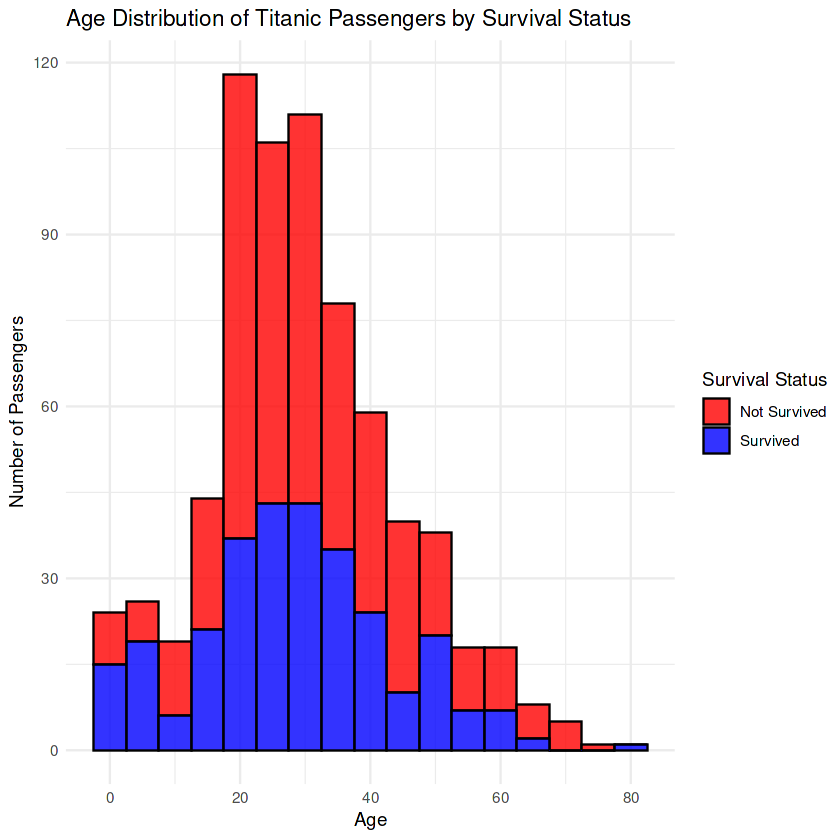

ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'age' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handle

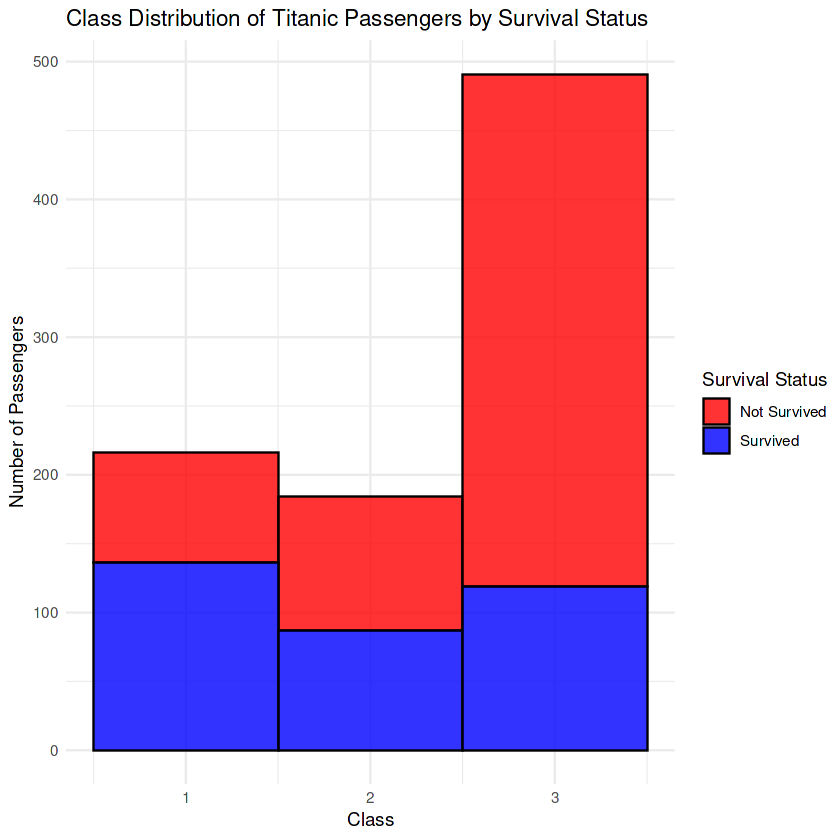

In [22]:
library(ggplot2)

#age histogram
ggplot(train, aes(x = Age, fill = factor(Survived))) +
  geom_histogram(binwidth = 5, position = "stack", alpha = 0.8, color = "black") +
  scale_fill_manual(values = c("red", "blue"), labels = c("Not Survived", "Survived")) +
  labs(title = "Age Distribution of Titanic Passengers by Survival Status",
       x = "Age", y = "Number of Passengers", fill = "Survival Status") +
  theme_minimal()

#class histogram
ggplot(train, aes(x = Pclass, fill = factor(Survived))) +
  geom_histogram(binwidth = 1, position = "stack", alpha = 0.8, color = "black") +
  scale_fill_manual(values = c("red", "blue"), labels = c("Not Survived", "Survived")) +
  labs(title = "Class Distribution of Titanic Passengers by Survival Status",
       x = "Class", y = "Number of Passengers", fill = "Survival Status") +
  theme_minimal()

#sex survival distirbution


In [ ]:
#store gender as a 1 and 2 instead of M and F (2 is male, 1 is female)
train$Sex <- as.factor(train$Sex) 
train$Sex <- as.numeric(train$Sex)

test$Sex <- as.factor(test$Sex) 
test$Sex <- as.numeric(test$Sex)


In [ ]:
train$Survived <- as.factor(train$Survived) #make survived as a factor so we can do binary classification

In [ ]:
head(train) #view the cleaned dataset

## **Data Metrics** 

In [ ]:
print(paste("The average class was: " , mean(train$Pclass)))
print(paste("The average age was: " , mean(train$Age, na.rm = TRUE)))
print(paste("The average number of siblings/spouses was: " , mean(train$SibSp)))
print(paste("The average number of parents/children was: ", mean(train$Parch)))
print(paste("The average Fare price was:", mean(train$Fare)))



In [ ]:
# get rid of columns that are unrelated to predictions, passenger ID, name, and ticket number
train <- train[,-c(1,4,9)] 

##  **Missing Values and Imputation**

Lets see what type of values we are missing

In [ ]:
na_counts <- colSums(is.na(train))
na_counts

All 177 of the missing values are from Age. Instead of dropping 177 rows, I will impute it in order to train the model off of a larger dataset. 

**Imputation of Missing Values**

**Method : Median Imputation**

First, I will use the median to impute data. I will set the age of the missing values to the median. I chose the median rather than the mean because the median is less sensitive to outliers in the data

In [ ]:
train$Age[is.na(train$Age)] <- median(train$Age, na.rm = TRUE)

In [ ]:
na_counts <- colSums(is.na(train))
na_counts

In [ ]:
head(train)

In [ ]:
print("Possible Age Values")
unique(train$Age)
print("Possible Sibling/Spouse Values")
unique(train$SibSp)
print("Possible Parent/Child Value")
unique(train$Parch)

## **Data Analysis**

Violin Plot to See distribution of different variables.

Class distribution and survived

# **Model Building**

## **Random Forest** 

In [ ]:
#load required package
library(caret)
library(randomForest)

In [ ]:
#data processing with cross validation
trainControl <- trainControl(method = "cv", number = 5)

In [ ]:
rf <- train(Survived ~ ., data = train, method = "rf", trControl = trainControl)

# Print the model
print(rf)